In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('HousePrice.csv')

In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


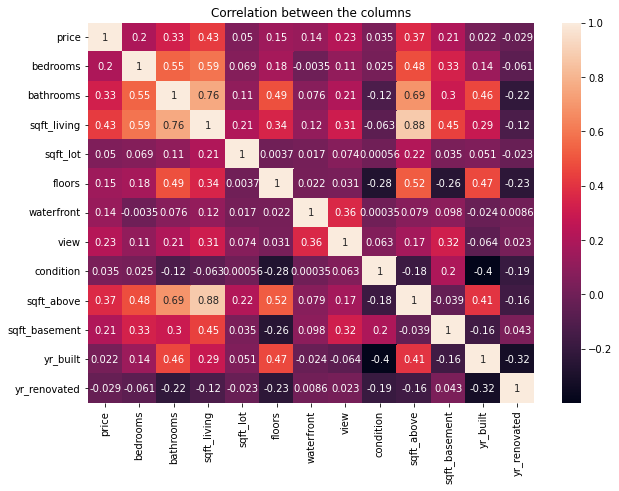

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [25]:
x = df.loc[:,['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','yr_built','yr_renovated']]


In [26]:
y = df.loc[:,['price']]

In [27]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1976,1992


In [28]:
y.head()

,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.546850954230177

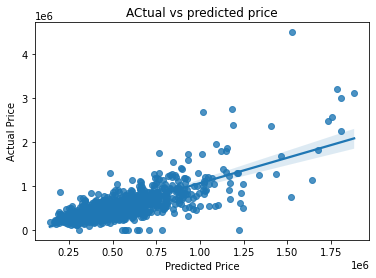

In [37]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [38]:
import pickle


In [39]:
file = open('model.pkl','wb')

In [40]:
pickle.dump(model, file)
